In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [3]:
conn=sqlite3.connect('inventory.db')
df=pd.read_sql_query('select * from vendor_sales_summary',conn)
df.head()

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Description,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,1750.0,145080,3811251.60,47087.0,1707309.13,301616.97,86515.62,68601.68,Jack Daniels No 7 Black,-2103942.47,-123.231489,0.324559,0.447965
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,164038,3804041.22,47487.0,1428697.97,247380.08,87250.96,144929.24,Tito's Handmade Vodka,-2375343.25,-166.259300,0.289488,0.375574
2,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,187407,3418303.68,59574.0,1503107.76,214818.56,109459.64,123780.22,Absolut 80 Proof,-1915195.92,-127.415743,0.317886,0.439723
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,201682,3261197.94,95232.0,2123766.68,199603.52,174981.77,257032.07,Capt Morgan Spiced Rum,-1137431.26,-53.557261,0.472189,0.651223
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,138109,3023206.01,48774.0,1521176.26,241547.02,89615.90,257032.07,Ketel One Vodka,-1502029.75,-98.741335,0.353156,0.503167


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,1.107537e+03,4206.341614,0.00,3.000000,64.000000,609.250000,1.414690e+05
TotalSalesDollars,10692.0,1.480398e+04,58689.751314,0.00,65.985000,1350.140000,9439.882500,2.123767e+06
TotalSalesPrice,10692.0,7.145302e+03,18480.951749,0.00,19.552500,669.430000,5449.935000,3.016170e+05


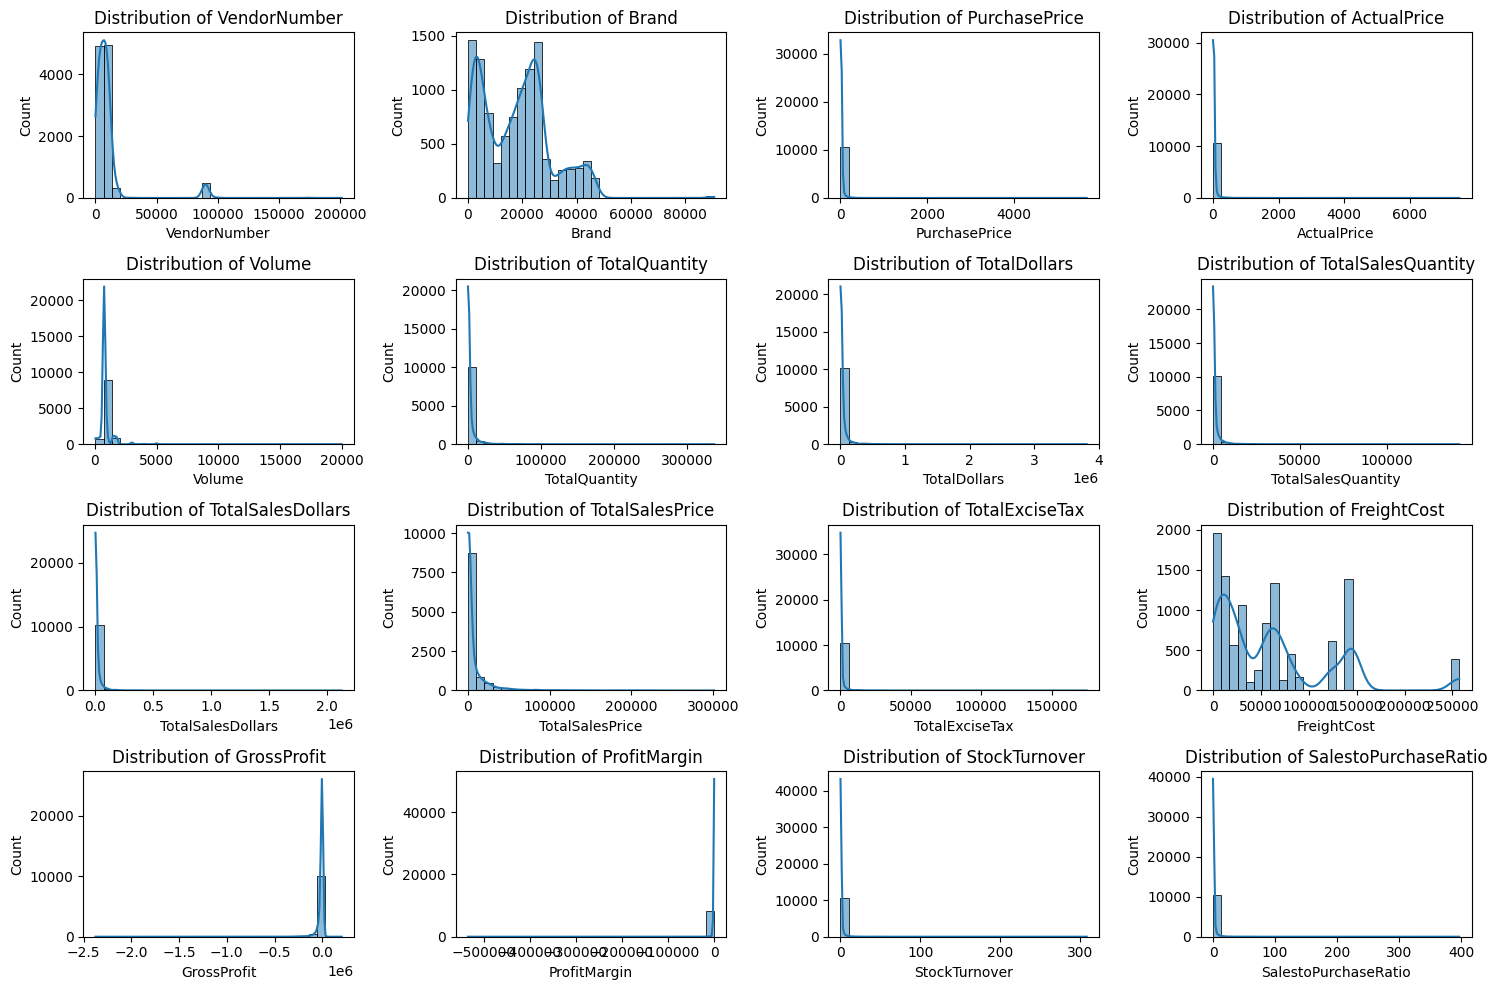

In [5]:
# Distribution Plot for Numerical Columns\
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

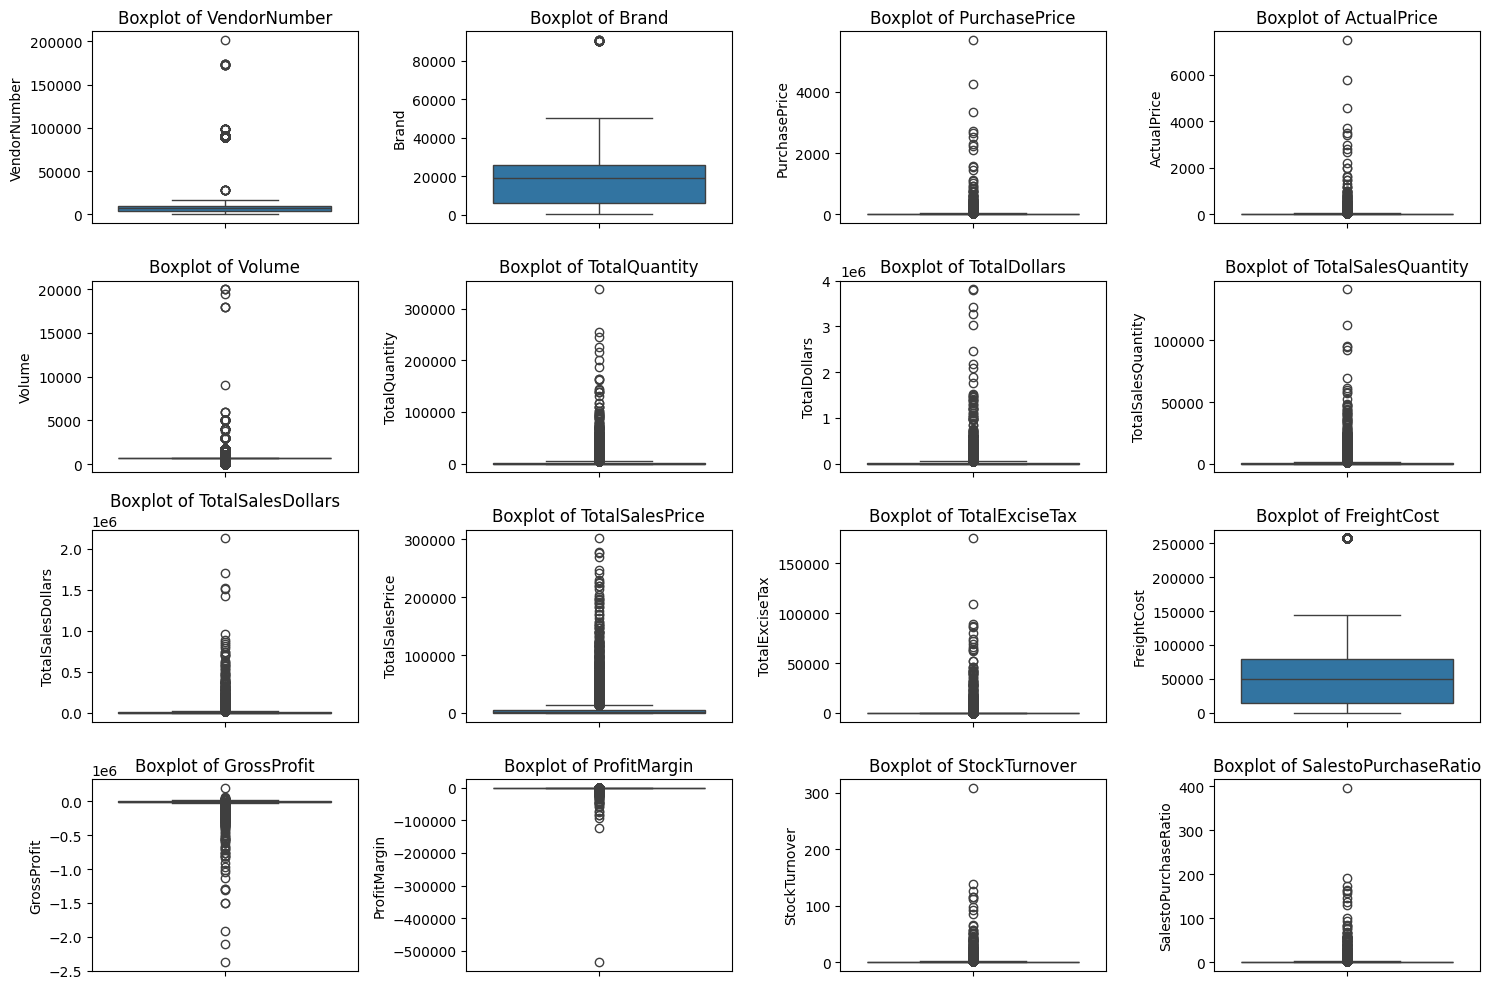

In [6]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [7]:
# Filtering data by removing inconsistencies
df=pd.read_sql_query('''SELECT * from vendor_sales_summary
                     where GrossProfit >= 0
                     AND ProfitMargin >= 0
                     AND TotalSalesQuantity>0''',conn)

In [8]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Description,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,5299,15.26,21.99,1750.0,15196,231890.96,12979.0,298180.21,121565.29,23847.88,68601.68,Southern Comfort,66289.25,22.231271,0.854106,1.285864
1,1392,CONSTELLATION BRANDS INC,6650,7.38,14.99,750.0,25851,190780.38,16764.0,196814.36,41519.49,1880.24,79528.99,Simi Chard,6033.98,3.065823,0.648486,1.031628
2,12546,JIM BEAM BRANDS COMPANY,1476,16.05,21.99,1750.0,11569,185682.45,17176.0,388929.24,107629.35,31557.27,123880.97,Jim Beam Traveler,203246.79,52.258038,1.484657,2.094593
3,480,BACARDI USA INC,8358,14.49,19.99,750.0,7071,102458.79,5439.0,108725.61,63608.18,4284.69,89286.27,Bacardi 151 Proof,6266.82,5.763886,0.769198,1.061164
4,1128,BROWN-FORMAN CORP,5297,10.76,13.99,750.0,8616,92708.16,6871.0,100215.29,57343.03,5412.66,68601.68,Southern Comfort,7507.13,7.491003,0.797470,1.080976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,3960,DIAGEO NORTH AMERICA INC,2626,1.42,1.99,50.0,2,2.84,24.0,47.76,3.98,1.26,257032.07,Crown Royal Apple,44.92,94.053601,12.000000,16.816901
1941,9815,WINE GROUP INC,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,Concannon Glen Ellen Wh Zin,13.31,83.448276,2.500000,6.041667
1942,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,6,2.34,256.0,125.44,1.96,13.44,50293.62,Dr McGillicuddy's Apple Pie,123.10,98.134566,42.666667,53.606838
1943,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,1,1.47,20.0,39.80,17.91,4.20,257032.07,The Club Strawbry Margarita,38.33,96.306533,20.000000,27.074830


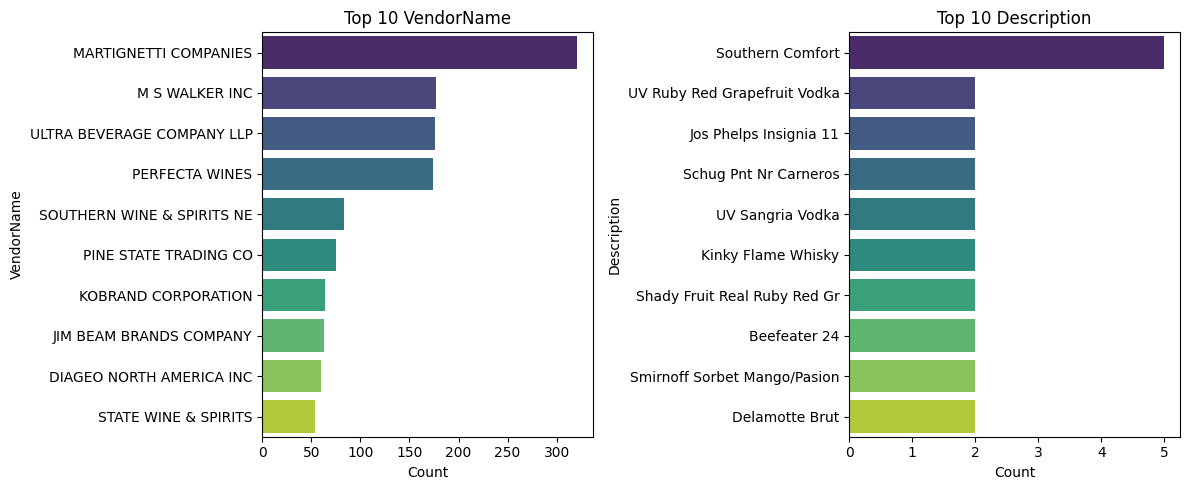

In [9]:
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    
    top_categories = df[col].value_counts().nlargest(10)
    
    sns.barplot(y=top_categories.index, x=top_categories.values, palette="viridis")
    
    plt.title(f'Top 10 {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


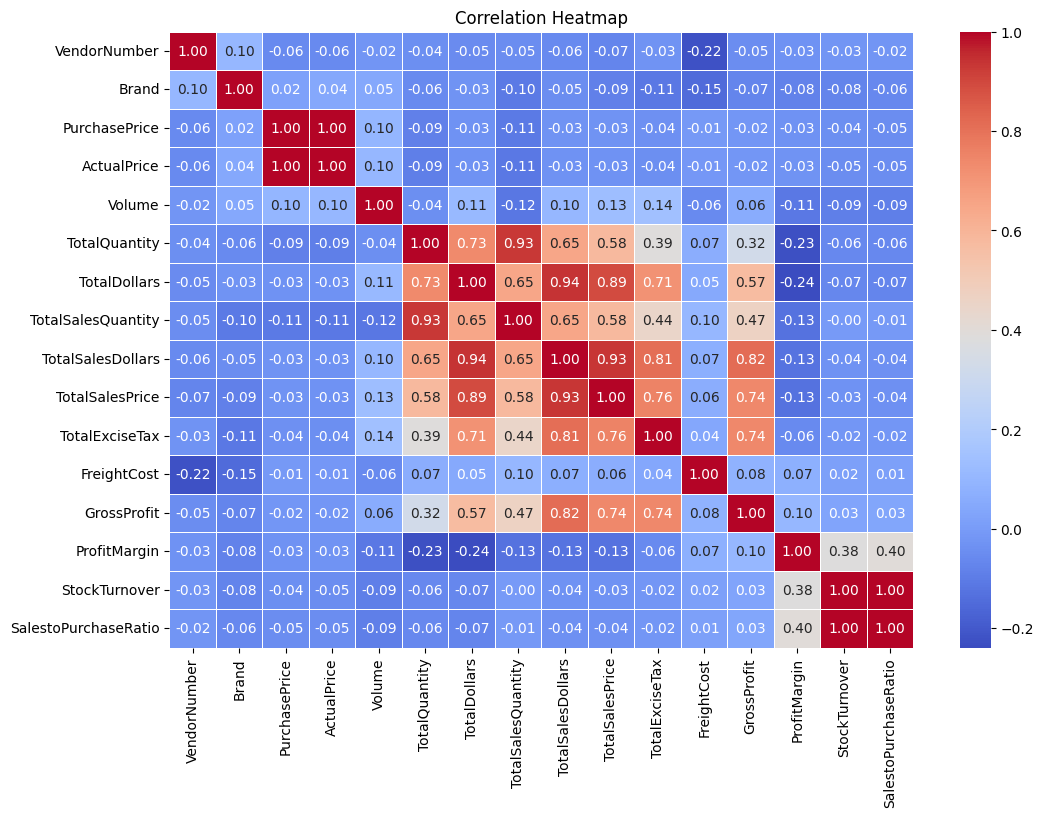

In [10]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

***Identify brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins*

In [70]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean',
}).reset_index()
brand_performance
brand_performance=brand_performance.to_csv('brand_performance.csv', index=False)

In [24]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [25]:
low_sales_threshold

np.float64(255.99800000000002)

In [27]:
# Filter Brands with low Sales but high profit margins
target_brands=brand_performance[(brand_performance['TotalSalesDollars']<=low_sales_threshold)&(brand_performance['ProfitMargin']>=high_margin_threshold)]
print("Brands with low sales but high profit margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
1734,The Club Strawbry Margarita,39.80,96.306533
623,Crown Royal Apple,47.76,94.053601
1733,The Club Mudslide,63.68,88.614950
1786,Tracia Syrah,82.39,93.724967
89,Aresti Pnt Nr Curico Vly,84.83,96.133443
1464,Riunite Sweet White,95.84,95.722037
1406,Promesses de France CdRhone,103.87,94.695292
1755,Three Olives Grape Vodka,114.84,99.381749
1272,Occhio A Vento Vermentino,115.71,88.678593
707,Dr McGillicuddy's Apple Pie,125.44,98.134566


In [28]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

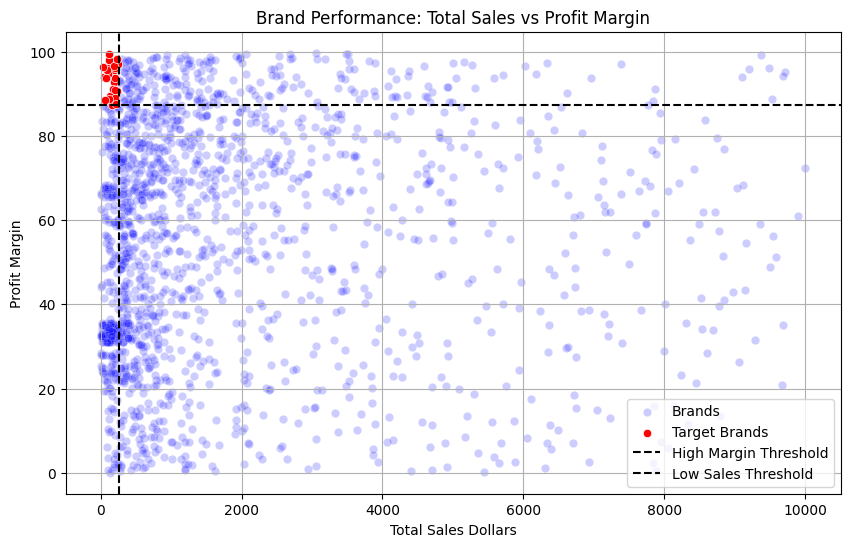

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color="blue",label='Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color="red",label='Target Brands')
plt.axhline(high_margin_threshold, color='black', linestyle='--', label='High Margin Threshold')
plt.axvline(low_sales_threshold, color='black',linestyle='--', label='Low Sales Threshold')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin')
plt.title('Brand Performance: Total Sales vs Profit Margin')
plt.legend()
plt.grid(True)
plt.show()

*Which vendors and brands demonstrate the highest sales performance*

In [34]:
def format_dollars(value):
    if value>=1000000:
        return f"{value/1000000: .2f}M"
    elif value>=1000:
        return f"{value/1000: .2f}K"
    else:
        return str(value)

In [33]:
top_vendors=df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         1889430.20
ULTRA BEVERAGE COMPANY LLP    1351438.33
BROWN-FORMAN CORP              734652.28
JIM BEAM BRANDS COMPANY        720784.94
M S WALKER INC                 535457.79
PERFECTA WINES                 452537.54
CONSTELLATION BRANDS INC       386904.86
BACARDI USA INC                372524.16
DIAGEO NORTH AMERICA INC       315244.17
E & J GALLO WINERY             274324.80
Name: TotalSalesDollars, dtype: float64

In [35]:
top_brands.apply(lambda x: format_dollars(x))

Description
Southern Comfort                 522.21K
Jim Beam Traveler                388.93K
Simi Chard                       196.81K
Sebastiani Znfdl Sonoma Cnty     116.16K
Bacardi 151 Proof                108.73K
Carpineto Dogajolo Tuscan Rd     107.42K
Cecchi Sangiovese                 97.29K
Turning Leaf RSV Chard Cal        89.25K
Peter Lehmann Shiraz              84.60K
Banfi Centine Mntcln Tscna        80.19K
Name: TotalSalesDollars, dtype: object

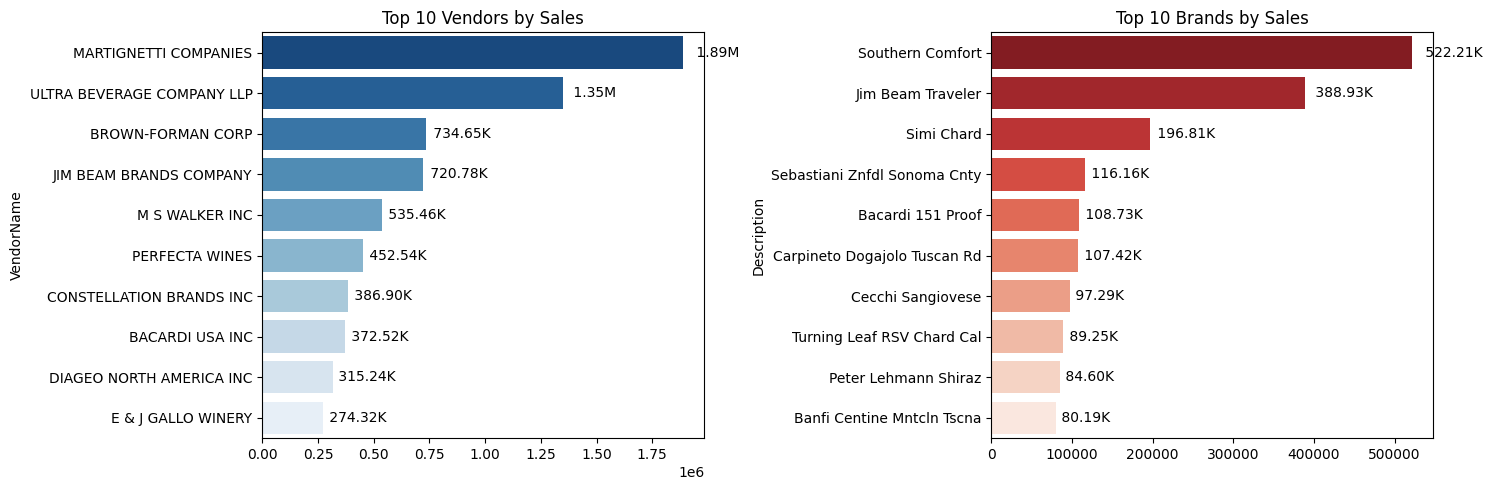

In [37]:
plt.figure(figsize=(15,5))
# Plot for top vendors
plt.subplot(1, 2, 1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values,palette="Blues_r")
plt.title('Top 10 Vendors by Sales')
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
# Plot for top Brnads
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title('Top 10 Brands by Sales')
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

*Which vendors contribute the most to total purchase dollars*

In [39]:
vendor_perform=df.groupby('VendorName').agg({'TotalDollars': 'sum', 'GrossProfit':'sum','TotalSalesDollars':'sum'}).reset_index()

In [ ]:
vendor_perform['PurchaseContribution%']= (vendor_perform['TotalDollars'] / vendor_perform['TotalDollars'].sum()) * 100

In [43]:
vendor_perform.sort_values('PurchaseContribution%', ascending=False)


,VendorName,TotalDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
39,MARTIGNETTI COMPANIES,1069142.97,820287.23,1889430.20,18.371984
78,ULTRA BEVERAGE COMPANY LLP,782917.95,568520.38,1351438.33,13.453538
6,BROWN-FORMAN CORP,533976.97,200675.31,734652.28,9.175776
29,JIM BEAM BRANDS COMPANY,361169.78,359615.16,720784.94,6.206284
10,CONSTELLATION BRANDS INC,293800.69,93104.17,386904.86,5.048625
...,...,...,...,...,...
38,MARSALLE COMPANY,78.78,3447.26,3526.04,0.001354
65,SILVER MOUNTAIN CIDERS,77.18,216.40,293.58,0.001326
62,SEA HAGG DISTILLERY LLC,54.88,61.99,116.87,0.000943
8,CAPSTONE INTERNATIONAL,54.64,382.13,436.77,0.000939


In [48]:
# DIsplay Top 10 Vendors
top_vendors = vendor_perform.sort_values('PurchaseContribution%', ascending=False).head(10)
top_vendors['TotalSalesDollars'] =top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalDollars'] = top_vendors['TotalDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
39,MARTIGNETTI COMPANIES,1.07M,820.29K,1.89M,18.371984
78,ULTRA BEVERAGE COMPANY LLP,782.92K,568.52K,1.35M,13.453538
6,BROWN-FORMAN CORP,533.98K,200.68K,734.65K,9.175776
29,JIM BEAM BRANDS COMPANY,361.17K,359.62K,720.78K,6.206284
10,CONSTELLATION BRANDS INC,293.80K,93.10K,386.90K,5.048625
49,PERFECTA WINES,237.27K,215.27K,452.54K,4.077196
36,M S WALKER INC,211.82K,323.64K,535.46K,3.639816
77,TRINCHERO FAMILY ESTATES,207.71K,27.15K,234.86K,3.569319
2,BACARDI USA INC,189.57K,182.95K,372.52K,3.257576
19,E & J GALLO WINERY,186.15K,88.18K,274.32K,3.198768


In [49]:
top_vendors['PurchaseContribution%'].sum()

np.float64(69.99888138342766)

In [50]:
top_vendors['Cumulative_Contribution']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution
39,MARTIGNETTI COMPANIES,1.07M,820.29K,1.89M,18.371984,18.371984
78,ULTRA BEVERAGE COMPANY LLP,782.92K,568.52K,1.35M,13.453538,31.825522
6,BROWN-FORMAN CORP,533.98K,200.68K,734.65K,9.175776,41.001298
29,JIM BEAM BRANDS COMPANY,361.17K,359.62K,720.78K,6.206284,47.207583
10,CONSTELLATION BRANDS INC,293.80K,93.10K,386.90K,5.048625,52.256208
49,PERFECTA WINES,237.27K,215.27K,452.54K,4.077196,56.333404
36,M S WALKER INC,211.82K,323.64K,535.46K,3.639816,59.973219
77,TRINCHERO FAMILY ESTATES,207.71K,27.15K,234.86K,3.569319,63.542538
2,BACARDI USA INC,189.57K,182.95K,372.52K,3.257576,66.800114
19,E & J GALLO WINERY,186.15K,88.18K,274.32K,3.198768,69.998881


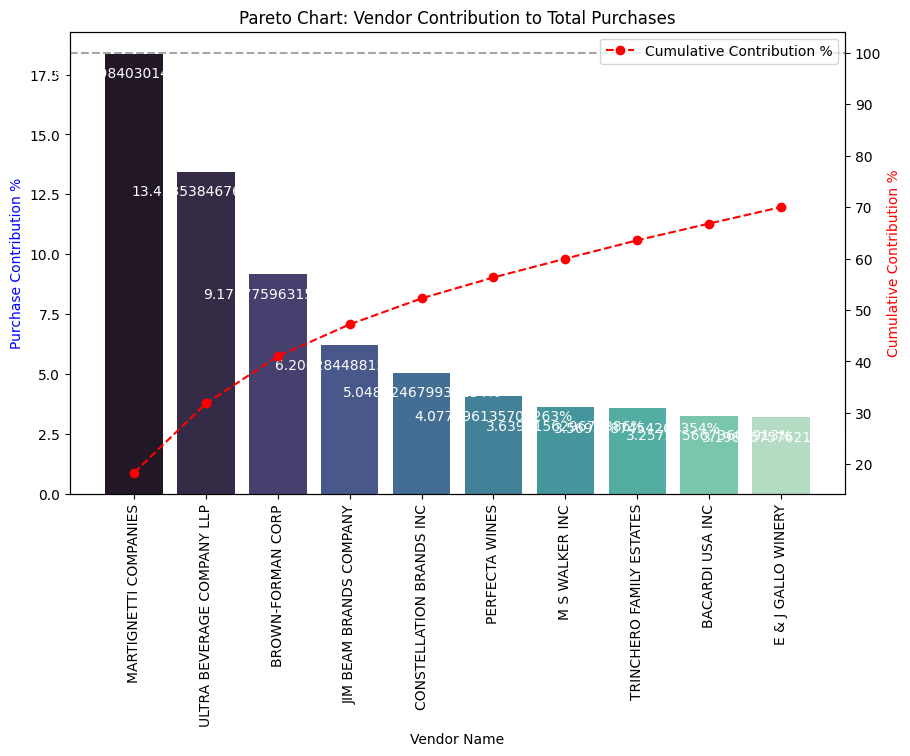

In [54]:
fig,ax1=plt.subplots(figsize=(10,6))
# Bar plt for purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value -1,str(value) + '%', ha='center', fontsize=10, color='white')
# Line plot for cumulative contribution
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendor Name')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100,color='gray', linestyle='--', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()


How much of total procurement is dependent on the top vendors

In [55]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")

Total Purchase Contribution of top 10 vendors is 70.0%


In [56]:
df['UnitPurchasePrices']=df['TotalDollars'] /df['TotalQuantity']
df

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalQuantity,TotalDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Description,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrices
0,1128,BROWN-FORMAN CORP,5299,15.26,21.99,1750.0,15196,231890.96,12979.0,298180.21,121565.29,23847.88,68601.68,Southern Comfort,66289.25,22.231271,0.854106,1.285864,15.26
1,1392,CONSTELLATION BRANDS INC,6650,7.38,14.99,750.0,25851,190780.38,16764.0,196814.36,41519.49,1880.24,79528.99,Simi Chard,6033.98,3.065823,0.648486,1.031628,7.38
2,12546,JIM BEAM BRANDS COMPANY,1476,16.05,21.99,1750.0,11569,185682.45,17176.0,388929.24,107629.35,31557.27,123880.97,Jim Beam Traveler,203246.79,52.258038,1.484657,2.094593,16.05
3,480,BACARDI USA INC,8358,14.49,19.99,750.0,7071,102458.79,5439.0,108725.61,63608.18,4284.69,89286.27,Bacardi 151 Proof,6266.82,5.763886,0.769198,1.061164,14.49
4,1128,BROWN-FORMAN CORP,5297,10.76,13.99,750.0,8616,92708.16,6871.0,100215.29,57343.03,5412.66,68601.68,Southern Comfort,7507.13,7.491003,0.797470,1.080976,10.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,3960,DIAGEO NORTH AMERICA INC,2626,1.42,1.99,50.0,2,2.84,24.0,47.76,3.98,1.26,257032.07,Crown Royal Apple,44.92,94.053601,12.000000,16.816901,1.42
1941,9815,WINE GROUP INC,8527,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,Concannon Glen Ellen Wh Zin,13.31,83.448276,2.500000,6.041667,1.32
1942,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,6,2.34,256.0,125.44,1.96,13.44,50293.62,Dr McGillicuddy's Apple Pie,123.10,98.134566,42.666667,53.606838,0.39
1943,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,1,1.47,20.0,39.80,17.91,4.20,257032.07,The Club Strawbry Margarita,38.33,96.306533,20.000000,27.074830,1.47


In [ ]:
df["OrderSize"]=pd.qcut(df["TotalQuantity"],q=3,labels=["Small","Medium","Large"])


In [58]:
df.groupby('OrderSize')[['UnitPurchasePrices']].mean()

,UnitPurchasePrices
OrderSize,
Small,37.998810
Medium,23.696154
Large,11.767337


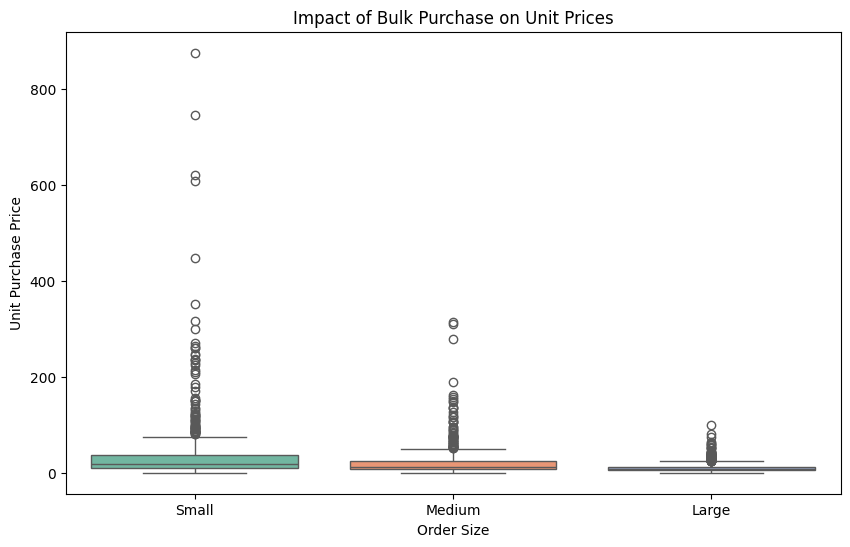

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrices',palette='Set2')
plt.title('Impact of Bulk Purchase on Unit Prices')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price')
plt.show()

*Which vendors have low inventory turnover, indicating excess stock and slow-moving products*

In [60]:
df[df['StockTurnover']<1].groupby('VendorName')['StockTurnover'].mean().sort_values(ascending=True).head(10)

VendorName
THE IMPORTED GRAPE LLC      0.402778
PSP WINES                   0.583333
STOLI GROUP,(USA) LLC       0.667966
BANFI PRODUCTS CORP         0.671425
POVERTY LANE ORCHARDS       0.683511
BRONCO WINE COMPANY         0.700000
SHAW ROSS INT L IMP LTD     0.700000
KOBRAND CORPORATION         0.713123
FREDERICK WILDMAN & SONS    0.716135
SEA BREEZE CELLARS LLC      0.718519
Name: StockTurnover, dtype: float64

*How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it*

In [63]:
df["UnsoldInventoryValue"]=(df["TotalQuantity"] -df["TotalSalesQuantity"])*df["UnitPurchasePrices"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInveentoryValue"].sum()))
df["UnsoldInventoryValue"]

Total Unsold Capital: -1185849.0200000007


0       33831.42
1       67062.06
2      -89992.35
3       23647.68
4       18776.20
          ...   
1940      -31.24
1941       -3.96
1942      -97.50
1943      -27.93
1944      -81.65
Name: UnsoldInventoryValue, Length: 1945, dtype: float64

In [64]:
# Aggregate Capital locked per venedor
inventory_value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort  vendors with the Highest Locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
77,TRINCHERO FAMILY ESTATES,64.71K
10,CONSTELLATION BRANDS INC,39.78K
3,BANFI PRODUCTS CORP,35.04K
69,STE MICHELLE WINE ESTATES,21.30K
6,BROWN-FORMAN CORP,17.94K
19,E & J GALLO WINERY,11.61K
76,TREASURY WINE ESTATES,10.54K
24,FREDERICK WILDMAN & SONS,10.41K
71,"STOLI GROUP,(USA) LLC",3.44K
72,SURVILLE ENTERPRISES CORP,2.56K


**95% confidence intervals for profit margins of top-performing/low-performing vendors**

In [65]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [66]:
top_vendors=df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()

In [67]:
low_vendors

990      2.564727
993      4.524106
999      5.450501
1027     7.535541
1039    18.882198
          ...    
1940    94.053601
1941    83.448276
1942    98.134566
1943    96.306533
1944    99.381749
Name: ProfitMargin, Length: 487, dtype: float64

In [68]:
def confidence_interval(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical=stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error=t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI:(46.93, 52.19),Mean: 49.56
Low Vendors 95% CI:(48.46, 53.04),Mean: 50.75


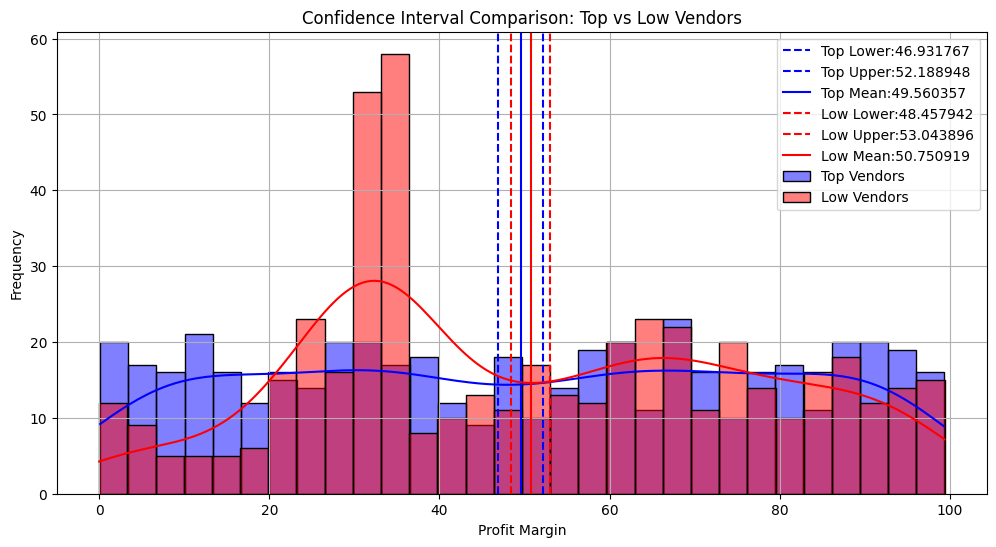

In [69]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% CI:({top_lower:.2f}, {top_upper:.2f}),Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI:({low_lower:.2f}, {low_upper:.2f}),Mean: {low_mean:.2f}")
plt.figure(figsize=(12,6))
sns.histplot(top_vendors, kde=True, color='blue', bins=30,alpha=0.5, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label=f'Top Lower:{top_lower:2f}' )
plt.axvline(top_upper, color='blue', linestyle='--', label=f'Top Upper:{top_upper:2f}')
plt.axvline(top_mean, color='blue', linestyle='-', label=f'Top Mean:{top_mean:2f}')

sns.histplot(low_vendors, kde=True, color='red', bins=30, alpha=0.5, label='Low Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label=f'Low Lower:{low_lower:2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'Low Upper:{low_upper:2f}')
plt.axvline(low_mean, color='red', linestyle='-', label=f'Low Mean:{low_mean:2f}')

plt.title('Confidence Interval Comparison: Top vs Low Vendors')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()